# About Dataset

About Dataset
Here's a description of each feature in the dataset:

building_id: A unique identifier for each building in the dataset.

district_id: The identifier for the district where the building is located.

vdcmun_id: The identifier for the Village Development Committee/Municipality where the building is situated.

ward_id: The identifier for the specific ward within the Village Development Committee/Municipality.

count_floors_pre_eq: The number of floors in the building before the earthquake.

count_floors_post_eq: The number of floors in the building after the earthquake (may differ from the pre-earthquake count).

age_building: The age of the building in years at the time of the earthquake.

plinth_area_sq_ft: The area of the building's plinth in square feet.

height_ft_pre_eq: The height of the building before the earthquake in feet.

height_ft_post_eq: The height of the building after the earthquake in feet.

land_surface_condition: The condition of the land surface where the building is located (e.g., "Flat," "Moderate slope," "Steep slope").

foundation_type: The type of foundation used for the building (e.g., "Mud mortar-Stone/Brick," "Bamboo/Timber," "Cement-Stone/Brick").

roof_type: The type of roof on the building (e.g., "Bamboo/Timber-Light roof," "RCC/RB/RBC," "Bamboo/Timber-Heavy roof").

ground_floor_type: The type of construction used for the ground floor (e.g., "Mud," "RC", "Other").

other_floor_type: The type of construction used for floors other than the ground floor (e.g., "Timber-Planck," "Bamboo-Timber," "RCC/RB/RBC").

position: The position of the building (e.g., "Not attached," "Attached-1 side," "Attached-2 side").

plan_configuration: The configuration or layout of the building (e.g., "Rectangular," "L-shape," "T-shape").

condition_post_eq: The condition of the building after the earthquake (e.g., "Damaged-Not used," "Damaged-Repaired and used," "Damaged-Rubble clear").

damage_grade: The grade of damage sustained by the building after the earthquake (e.g., "Grade 1," "Grade 2," "Grade 5").

technical_solution_proposed: The proposed technical solution for addressing the damage to the building.

superstructure: The type of superstructure used in the construction of the building (e.g., "Mud mortar-Stone/Brick," "Bamboo/Timber", "RC").

# Import Libraries

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Prepare Data

## Connect

In [24]:
df= pd.read_csv("eq2015.csv", index_col="building_id")
df.head()

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade,technical_solution_proposed,superstructure
building_id,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Grade 3,Major repair,has_superstructure_mud_mortar_stone
120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 5,Reconstruction,has_superstructure_mud_mortar_stone
120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair,has_superstructure_mud_mortar_stone
120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair,has_superstructure_mud_mortar_stone
120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 1,Minor repair,has_superstructure_mud_mortar_stone


In [25]:
df.shape

(762106, 20)

In [26]:
df.columns

Index(['district_id', 'vdcmun_id', 'ward_id', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'condition_post_eq', 'damage_grade',
       'technical_solution_proposed', 'superstructure'],
      dtype='object')

#### Let's check for data quality:

In [27]:
df.isnull().sum()

district_id                     0
vdcmun_id                       0
ward_id                         0
count_floors_pre_eq             0
count_floors_post_eq            0
age_building                    0
plinth_area_sq_ft               0
height_ft_pre_eq                0
height_ft_post_eq               0
land_surface_condition          0
foundation_type                 0
roof_type                       0
ground_floor_type               0
other_floor_type                0
position                        1
plan_configuration              1
condition_post_eq               0
damage_grade                   12
technical_solution_proposed    12
superstructure                  0
dtype: int64

Let's drop null values:

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

district_id                    0
vdcmun_id                      0
ward_id                        0
count_floors_pre_eq            0
count_floors_post_eq           0
age_building                   0
plinth_area_sq_ft              0
height_ft_pre_eq               0
height_ft_post_eq              0
land_surface_condition         0
foundation_type                0
roof_type                      0
ground_floor_type              0
other_floor_type               0
position                       0
plan_configuration             0
condition_post_eq              0
damage_grade                   0
technical_solution_proposed    0
superstructure                 0
dtype: int64

Now our data doesn't contains null values

In [30]:
df["district_id"].value_counts()

district_id
24    98019
31    90994
30    89122
23    88741
36    78074
28    77148
20    68749
22    60639
21    58612
12    39352
29    12644
Name: count, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762094 entries, 120101000011 to 366709001281
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   district_id                  762094 non-null  int64 
 1   vdcmun_id                    762094 non-null  int64 
 2   ward_id                      762094 non-null  int64 
 3   count_floors_pre_eq          762094 non-null  int64 
 4   count_floors_post_eq         762094 non-null  int64 
 5   age_building                 762094 non-null  int64 
 6   plinth_area_sq_ft            762094 non-null  int64 
 7   height_ft_pre_eq             762094 non-null  int64 
 8   height_ft_post_eq            762094 non-null  int64 
 9   land_surface_condition       762094 non-null  object
 10  foundation_type              762094 non-null  object
 11  roof_type                    762094 non-null  object
 12  ground_floor_type            762094 non-null  object
 13  ot

### Let's look into damage_grade columns

In [32]:
df["damage_grade"].unique()

array(['Grade 3', 'Grade 5', 'Grade 2', 'Grade 1', 'Grade 4'],
      dtype=object)

We want to build a binary classification model, but our current target "damage_grade" has more than two categories. So, let's create a new column "severe_damage" for buildings where the "damage_grade" is Grade 4 or above, "severe_damage" should be 1. For all other buildings, "severe_damage" should be 0 and drop "damage_grade" to avoid leakage.

In [33]:
df["damage_grade"]= df["damage_grade"].str[-1].astype(int)
df["severe_damage"]= (df["damage_grade"]>3).astype(int)
df.drop(columns=["damage_grade"], inplace=True)

In [34]:
print(df["severe_damage"].value_counts())

severe_damage
1    459610
0    302484
Name: count, dtype: int64


Since we are predicting whether or not a building suffer severe damage in an earthquake, for that we need to remove all the leaky feature, that is not going to be part of the original data.

Here we remove all that feature which is giving us the information of condition after the earthquake(post-earthquake) so we remove all the features that giving us the information of post_earthquake

In [35]:
drop_cols= [col for col in df.columns if "post_eq" in col]
df.drop(columns=drop_cols, inplace=True)

## Explore

Since our model will be a type of linear model, we need to make sure there's no issue with multicollinearity in our dataset. So, let's check for feature correlation

<Axes: >

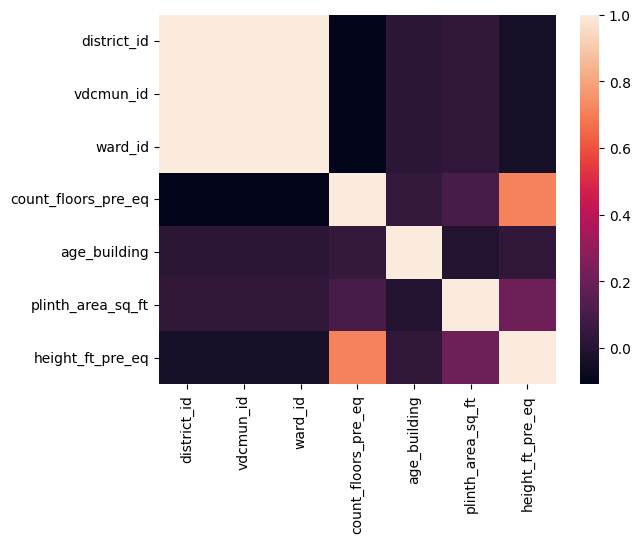

In [36]:
correlation= df.select_dtypes("number").drop(columns="severe_damage").corr()
sns.heatmap(correlation)

Here, we found 5 feature that can cause multi-colinearity problem. These are : vdcmun_id, ward_id, height_ft_pre_eq, count_floors_pre_eq

let's drop district_id, vdcmun_id, ward_id

Also technical_solution_proposed is a leaky feature let's drop it also

In [37]:
df.drop(columns=["district_id", "vdcmun_id", "ward_id","technical_solution_proposed"], inplace=True)

Select between count_floors_post_eq and height_ft_post_eq

In [39]:
from scipy import stats
# point_biserial correlation between count_floors_pre_eq and severe_damage
r_pb, p_value = stats.pointbiserialr(df["count_floors_pre_eq"], df["severe_damage"])

print("biserial correlation between count_floors_post_eq and severe_damage",r_pb)

r_pb, p_value = stats.pointbiserialr(df["height_ft_pre_eq"], df["severe_damage"])

print("biserial correlation between height_ft_post_eq and severe_damage",r_pb)

biserial correlation between count_floors_post_eq and severe_damage 0.16904872399985948
biserial correlation between height_ft_post_eq and severe_damage 0.04911364038144419


We are droping the count_floors_pre_eq as they have low relation with as compared to height_ft_pre_eq

In [40]:
df.drop(columns=["count_floors_pre_eq"], inplace=True)

let's check for outliers

In [74]:

num_df = df.select_dtypes("number").drop(columns="severe_damage")
num_df.describe()

,age_building,plinth_area_sq_ft,height_ft_pre_eq
count,762094.000000,762094.000000,762094.000000
mean,24.325031,406.673668,16.049424
std,65.034555,226.780437,5.493900
min,0.000000,70.000000,6.000000
25%,9.000000,280.000000,12.000000
50%,16.000000,358.000000,16.000000
75%,27.000000,470.000000,18.000000
max,999.000000,5000.000000,99.000000


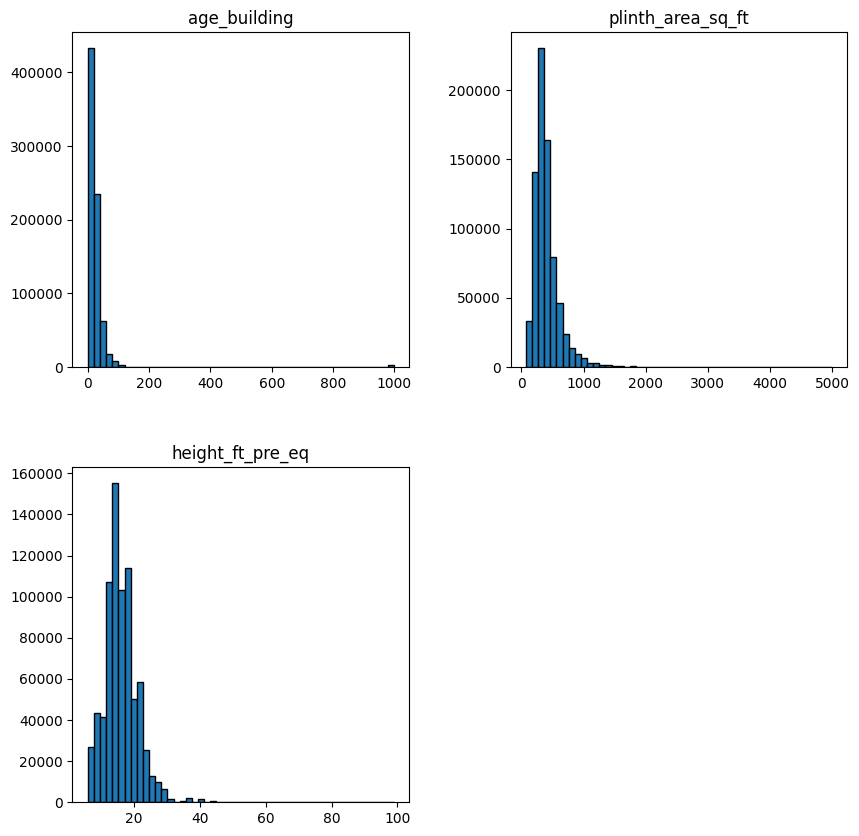

In [75]:
num_df.hist(bins=50,figsize=(10,10), grid=False, edgecolor="black");

So, we can see that our numerical features are heavily right skewed, let's replace these manually

In [76]:
num_df.loc[num_df["age_building"]<0, "age_building"]=0
num_df.loc[num_df["age_building"]>100, "age_building"]=100

In [77]:
lower_plinth, upper_plinth= df["plinth_area_sq_ft"].quantile([0.01, 0.9])
lower_plinth, upper_plinth

(120.0, 645.0)

In [78]:
num_df.loc[num_df["plinth_area_sq_ft"]<lower_plinth, "plinth_area_sq_ft"]=lower_plinth
num_df.loc[num_df["plinth_area_sq_ft"]>upper_plinth, "plinth_area_sq_ft"]=upper_plinth

In [80]:
num_df.loc[num_df["height_ft_pre_eq"]<10, "height_ft_pre_eq"]=10
num_df.loc[num_df["height_ft_pre_eq"]>45, "height_ft_pre_eq"]=45

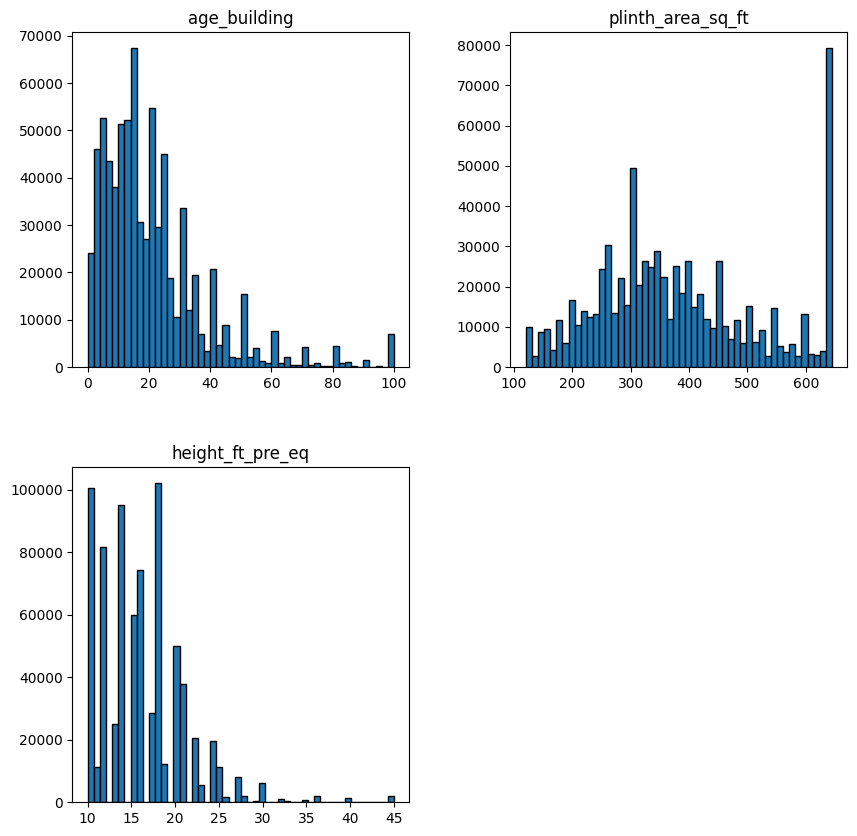

In [81]:
num_df.hist(bins=50,figsize=(10,10), grid=False, edgecolor="black");

Now our numerical features seems good distributed

Before we build our model, let's see if we can identify any obvious differences between houses that were severely damaged in the earthquake ("severe_damage"==1) those that were not ("severe_damage"==0). Let's start with a numerical feature. create a boxplot that shows the distributions of the "height_ft_pre_eq" column for both groups in the "severe_damage" column.

Text(0.5, 1.0, 'Distribution of building height by class')

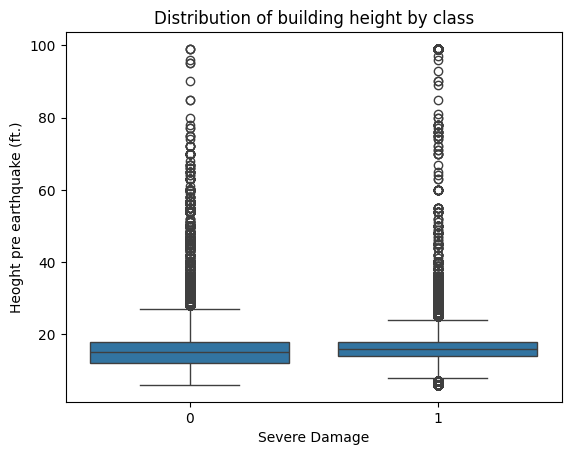

In [82]:
sns.boxplot(x=df["severe_damage"], y= df["height_ft_pre_eq"])
plt.xlabel("Severe Damage")
plt.ylabel("Heoght pre earthquake (ft.)")
plt.title("Distribution of building height by class")

This boxplot is not giving much information.

Before we move on to the many categorical features in this dataset, it's a good idea to see the balance between our two classes. What percentage were severely damaged, what percentage were not?

Text(0.5, 1.0, 'Class Balance')

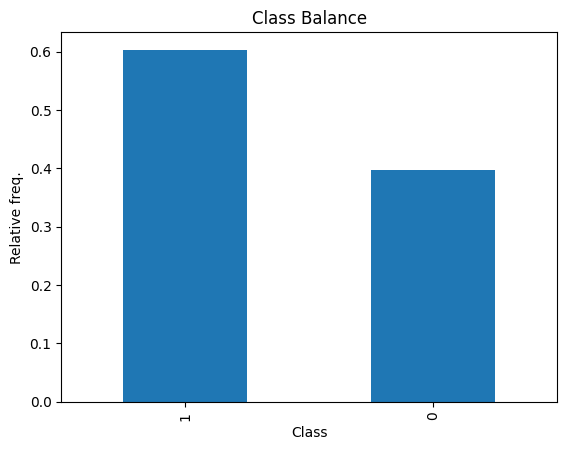

In [83]:
df["severe_damage"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Relative freq.")
plt.title("Class Balance")

Here we can see that our data is in balanced ratio(60-40).

 Are buildings with certain foundation types more likely to suffer severe damage? let's Create a pivot table of df where the index is "foundation_type" and the values come from the "severe_damage" column, aggregated by the mean.

In [84]:
foundation_pivot= df.pivot_table(
    index="foundation_type", 
    values="severe_damage", 
    aggfunc=np.mean).sort_values(by="severe_damage")

foundation_pivot

,severe_damage
foundation_type,
RC,0.038263
Bamboo/Timber,0.237855
Cement-Stone/Brick,0.296904
Other,0.510545
Mud mortar-Stone/Brick,0.685115


Let's check for majority and minority class proportion of "severe_damage"

In [85]:
majority_class_prop, minority_class_prop = df["severe_damage"].value_counts(normalize=True)
print(majority_class_prop, minority_class_prop)

0.6030883329353072 0.39691166706469283


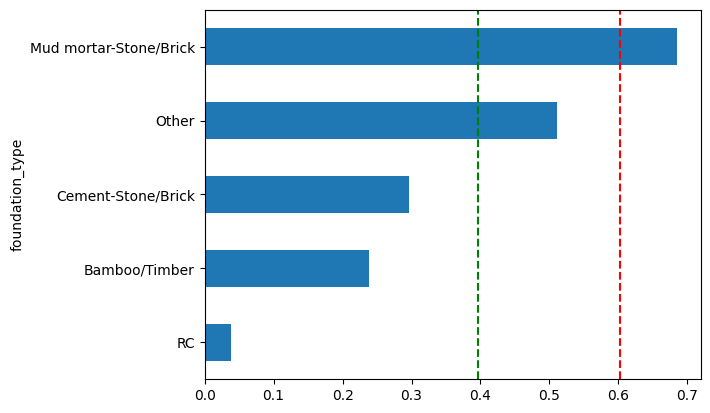

In [86]:
foundation_pivot.plot(kind="barh", legend=None)
plt.axvline(majority_class_prop, linestyle="--", color="red", label="Majority class")
plt.axvline(minority_class_prop, linestyle="--", color="green", label="Minority class")

Here, we can observed that mostly suffered buildings are built with Mud, mortar-stone and bricks

#### Now let's check fot high or low cardinality categorical features

In [87]:
df.select_dtypes("object").nunique()

land_surface_condition     3
foundation_type            5
roof_type                  3
ground_floor_type          5
other_floor_type           4
position                   4
plan_configuration        10
superstructure            11
dtype: int64

# Split:

In [88]:
target="severe_damage"
X= df.drop(columns=target)
y= df[target]

In [89]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(609675, 11)
(609675,)
(152419, 11)
(152419,)


# Build Model

### Baseline model

In [90]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.6


### Iterate

In [91]:
model= make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=1000)
)

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration',
                                     'superstructure'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

### Evaluate

In [92]:
acc_train= accuracy_score(y_train, model.predict(X_train))
acc_test= accuracy_score(y_test, model.predict(X_test))

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.73
Test Accuracy: 0.73


# Communicate

In [93]:
features = model.named_steps["onehotencoder"].get_feature_names_out()
importances = model.named_steps["logisticregression"].coef_[0]

let's create a pandas Series named odds_ratios, where the index is features and the values are your the exponential of the importances. 

In [94]:
odds_ratios = pd.Series(np.exp(importances), index= features).sort_values()
odds_ratios.head()

superstructure_has_superstructure_cement_mortar_brick    0.233223
foundation_type_RC                                       0.458537
roof_type_RCC/RB/RBC                                     0.495842
foundation_type_Bamboo/Timber                            0.524285
ground_floor_type_RC                                     0.568021
dtype: float64

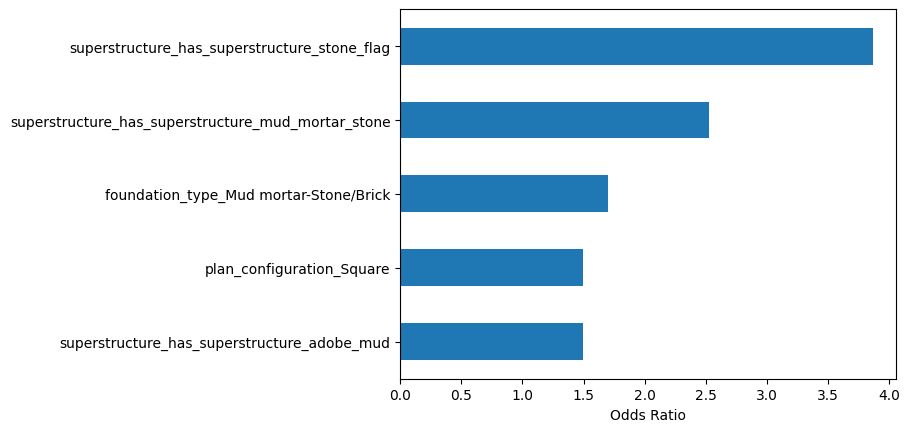

In [95]:
odds_ratios.tail().plot(kind="barh")
plt.xlabel("Odds Ratio");

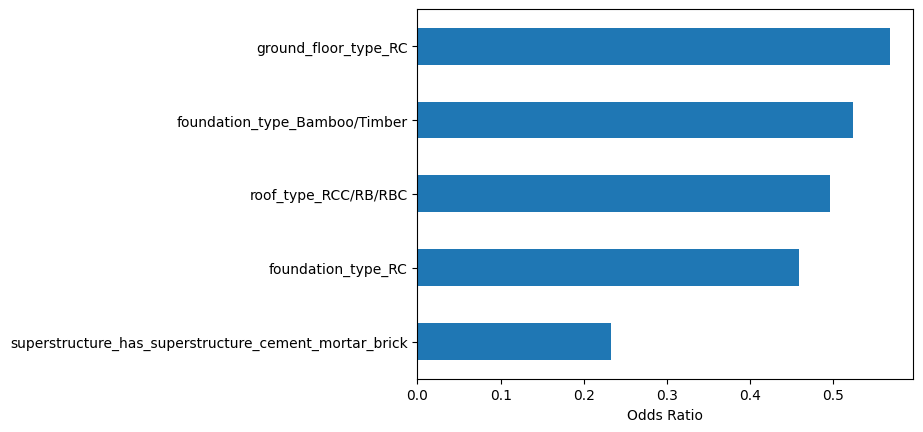

In [96]:
odds_ratios.head().plot(kind="barh")
plt.xlabel("Odds Ratio");

It's shows that buildings built with combination of mud is more damaged during earthquake. And buildings built using RC/ Reinforcement concrete are less damaged.

Our model performed better than dumb/baseline model but it's performance is not so good. So let's try out some tree based models:

# DecisionTree

Let's load data and perform data wrangling

In [98]:
def data_wrangling(filepath):
    df= pd.read_csv(filepath, index_col="building_id")

    df.dropna(inplace=True)

     # Identify leaky columns
    drop_cols = [col for col in df.columns if "pre_eq" in col]

     # Create binary target column
    df["damage_grade"] = df["damage_grade"].str[-1].astype(int)
    df["severe_damage"] = (df["damage_grade"] > 3).astype(int)

    # Drop old target
    drop_cols.append("damage_grade")

    # Drop multicollinearity column
    drop_cols.append("count_floors_post_eq")

    drop_cols.extend(["district_id", "vdcmun_id", "ward_id","technical_solution_proposed"])
    

    # Drop columns
    df.drop(columns=drop_cols, inplace=True)

    return df


In [99]:
data= data_wrangling("eq2015.csv");
data.head()

,age_building,plinth_area_sq_ft,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure,severe_damage
building_id,,,,,,,,,,,,,
120101000011,9,288,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,has_superstructure_mud_mortar_stone,0
120101000021,15,364,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,has_superstructure_mud_mortar_stone,1
120101000031,20,384,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,has_superstructure_mud_mortar_stone,0
120101000041,20,312,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,has_superstructure_mud_mortar_stone,0
120101000051,30,308,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,has_superstructure_mud_mortar_stone,0


## Split

In [100]:
target= "severe_damage"
X= df.drop(columns=target)
y= df[target]

In [101]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

### Let's divide our training data (X_train and y_train) into training and validation sets using a randomized train-test split. Validation data should be 20% of the remaining data. 

In [102]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=True)

## Build model:

### Baseline:

In [103]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.6


### Iterate

In [109]:
model = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(random_state=42)
)

model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration',
                                      'superstructure'],
                                mapping=[{'col': 'land_surface_condition',
                                          'data_type': dtype('O'),
                                          'mapping': Flat              1
Steep slope       2
Moderate slope    3
NaN              -2
dtype: int64},
                                         {'col': 'foundation_type',
                                          'dat...
has_superstructure_mud_mortar_brick        3
has_superstructure_cement_mortar_brick     4
has_superstructure_rc_non_engineered       5
has_superstructure_adobe_mud               6
has_superstructure_other                   7
has_superstructure_cement_mortar_stone     8
has_superstructure_stone_flag              9
has_superstructure_rc_engineered          10
has_superstructure_bamboo                 11
NaN                                       -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [110]:
results = cross_val_score(model, X_train, y_train, cv=5)
results

array([0.65191495, 0.6507873 , 0.65201747, 0.65430352, 0.65101283])

In [111]:
average_cv_score = np.mean(results)

print("Average Cross-Validation Score:", average_cv_score)


Average Cross-Validation Score: 0.6520072169598556


In [112]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = model.score(X_val, y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 0.94
Validation Accuracy: 0.66


There is a huge difference between(more than 5%) training and validation score. So, let's check for overfitting..

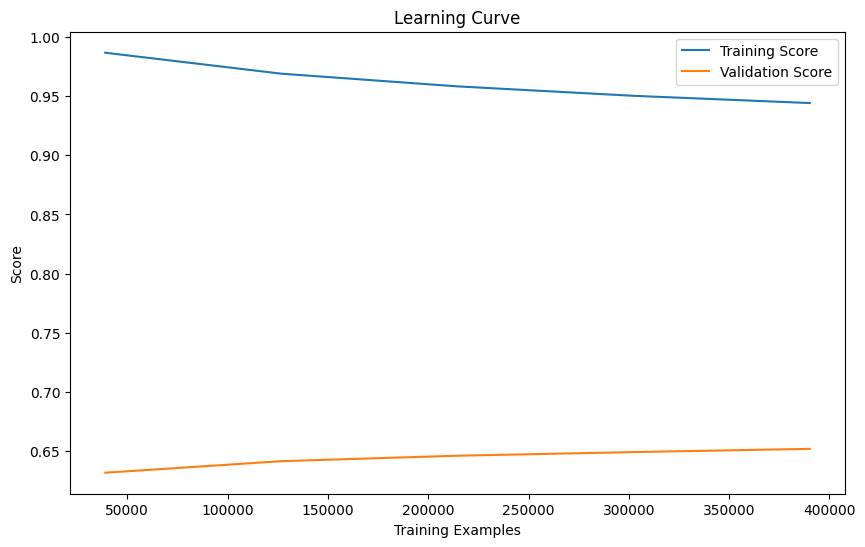

In [116]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, val_scores_mean, label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [117]:
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 63


There's a huge gap between training and validation score. Clearly our model is overfitting, so let's do hyperparameter tuning:

### Hyperparameter tuning

In [118]:
depth_hyperparams = range(1,50,2)

In [119]:
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(
        OrdinalEncoder(),
        DecisionTreeClassifier(max_depth=d,random_state=42)
    )
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train, y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val, y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.7065629228687416, 0.7240373969737975, 0.7302640751219912]
Validation Accuracy Scores: [0.7069750276786813, 0.7235166277114856, 0.7298232664944437]


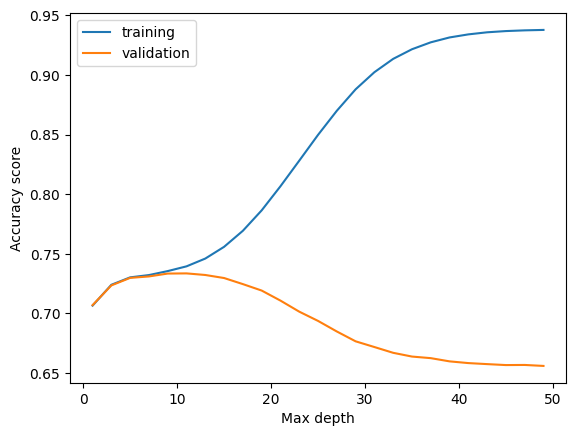

In [120]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc, label="training")
plt.plot(depth_hyperparams, validation_acc, label="validation")
plt.xlabel("Max depth")
plt.ylabel("Accuracy score")
plt.legend();

In [123]:
model = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=6, random_state=42)
)
# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration',
                                      'superstructure'],
                                mapping=[{'col': 'land_surface_condition',
                                          'data_type': dtype('O'),
                                          'mapping': Flat              1
Steep slope       2
Moderate slope    3
NaN              -2
dtype: int64},
                                         {'col': 'foundation_type',
                                          'dat...
has_superstructure_cement_mortar_brick     4
has_superstructure_rc_non_engineered       5
has_superstructure_adobe_mud               6
has_superstructure_other                   7
has_superstructure_cement_mortar_stone     8
has_superstructure_stone_flag              9
has_superstructure_rc_engineered          10
has_superstructure_bamboo                 11
NaN                                       -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

## Evaluate:

In [124]:
test_acc = model.score(X_test, y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.73


## Comunicate:

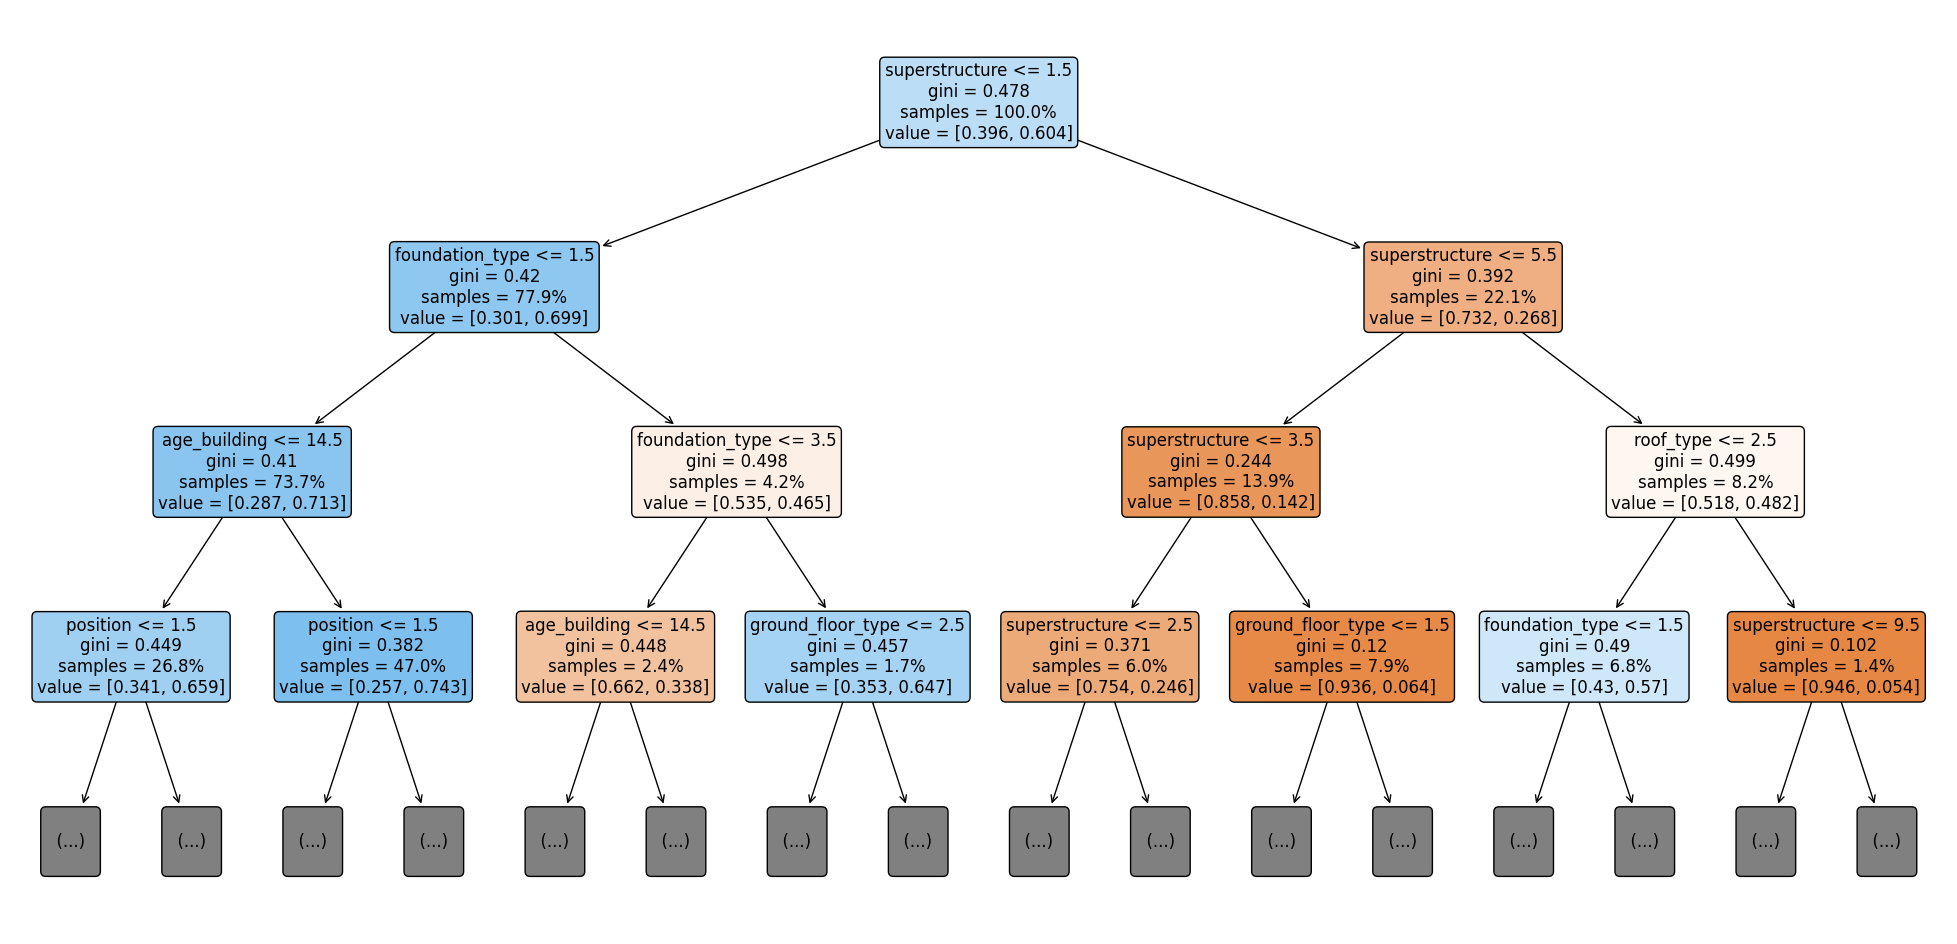

In [125]:
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns.to_list(),
    filled=True,  
    rounded=True,  
    proportion=True,  
    max_depth=3,  
    fontsize=12,  
    ax=ax,  
);

In [129]:
features = X_train.columns.to_list()
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: ['age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq']
Importances: [0.02932862 0.00287007 0.00907767]


In [130]:
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.head()

land_surface_condition    0.000986
plan_configuration        0.001018
plinth_area_sq_ft         0.002870
ground_floor_type         0.008673
height_ft_pre_eq          0.009078
dtype: float64

Text(0.5, 0, 'Gini Importance')

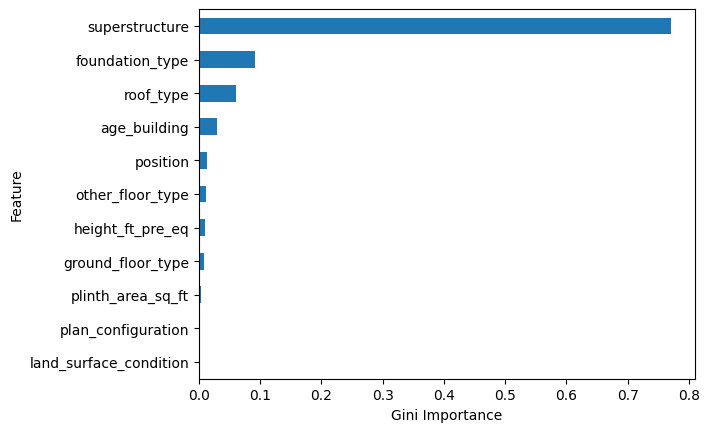

In [128]:
feat_imp.plot(kind="barh")
plt.ylabel("Feature")
plt.xlabel("Gini Importance")

So superstructure , foundation_type, roof_type, age_building, and position are important features to reduce gini impurity in our model.

So our tree based model performed slightly better than linear model.